In [1]:

import pandas as pd 
import numpy as np

#stats
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud ,STOPWORDS
from PIL import Image

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import textblob
#import xgboost

from textblob import TextBlob
#pip install textblob
import matplotlib.pyplot as plt
import os


In [31]:
df=pd.read_excel(r'C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/Topic Translated Data V3.xlsx',sheet_name='Sheet1')

In [32]:
df.head()

date        asin  year  weeknum  fiscal_year  fiscal_month  \
0 2020-12-20  B07ZPDV5NJ  2020       51         2020            12   
1 2020-12-20  B087ZG9VTV  2020       51         2020            12   
2 2020-12-21  B07BVW522M  2020       51         2020            12   
3 2020-12-21  B087ZFLY3K  2020       51         2020            12   
4 2020-12-21  B087ZFLY3K  2020       51         2020            12   

   first_party_ordered_sales_vc  first_party_ordered_sales_local_vc  \
0                          89.1                               78.02   
1                         304.0                              266.24   
2                         151.9                              133.03   
3                         105.0                               91.92   
4                         105.0                               91.92   

   first_party_ordered_units_vc  average_sales_price_vc  ...  \
0                            22                     3.5  ...   
1                            64                     4.2  ...   
2                            17                     7.8  ...   
3                            26                     3.5  ...   
4                            26                     3.5  ...   

   useful_ratings_positive  feature_wise_rating  qna_answered  \
0                        3                    1             4   
1                        1                    1             4   
2                        4                    1             6   
3                        3                    1             4   
4                        3                    1             4   

                                               title  \
0  Neutrogena Anti-Pickel Gesichtspflege, SOS Sof...   
1  Neutrogena Curcuma Clear Beruhigender Reinigun...   
2  Neutrogena Hydro Boost Hyaluron Serum, Aqua Pe...   
3  Neutrogena Curcuma Clear Gesichtsreinigung, Be...   
4  Neutrogena Curcuma Clear Gesichtsreinigung, Be...   

                                             text_pr  \
0  Bei mir hilft es leider nicht. Beim Auftragen ...   
1  Wirkt und trocknet die Haut nicht aus. Habe sc...   
2                                                 Ja   
3  Brennt auf der Haut, danach ist die Haut schli...   
4                                          â˜¹â˜¹â˜¹   

                                  text_pr_translated  \
0  Unfortunately it doesn't help me. A burning se...   
1  Effective and does not dry out the skin. I've ...   
2                                                And   
3  Burns on the skin, then the skin is worse than...   
4                                                NaN   

                                    translated_title  text_sentiment_sc  \
0  Neutrogena anti-pimple face care, SOS immediat...           0.040000   
1  Neutrogena Curcuma Clear Soothing cleansing fo...           0.383333   
2  Neutrogena Hydro Boost Hyaluron Serum, aqua pe...           0.000000   
3  Neutrogena Curcuma Clear facial cleansing, soo...          -0.122222   
4  Neutrogena Curcuma Clear facial cleansing, soo...           0.000000   

         Top Keywords             Topic  
0          burns skin  Product Features  
1  effective dry skin  Product Features  
2                 and  Product Features  
3          burns skin  Product Features  
4                Good  Product Features  

[5 rows x 132 columns]

In [33]:
df.shape

(2437, 132)

In [34]:
df.dropna(subset=['text_pr_translated'],inplace=True)

In [35]:
df['text_pr_translated'].isnull().sum()

0

In [16]:
#df.dropna(subset=['text_pr_translated'],inplace=True)

In [18]:
df.conversion_rate_vc

0       0.1654
1       0.1065
2       0.0664
3       0.1390
5       0.0843
         ...  
2432    0.0932
2433    0.1538
2434    0.1154
2435    0.2628
2436    0.2628
Name: conversion_rate_vc, Length: 2417, dtype: float64

In [19]:
df.rename(columns={'gsr_level_2':'Gsr Level 2'},inplace=True)

# Average Conversion Rate at the Product Sub Category Level for all 4 Topics

In [20]:
result = pd.pivot_table(data=df, index='Gsr Level 2', columns='Topic',values='conversion_rate_vc', aggfunc=np.mean).transpose()
result



Gsr Level 2       Acne Treatments  Cleansers  Moisturisers
Topic                                                     
Delivery                 0.172190   0.109665      0.143485
Packaging                0.185755   0.120347      0.122914
Pricing                  0.222080   0.161428      0.117555
Product Features         0.149195   0.158965      0.120930

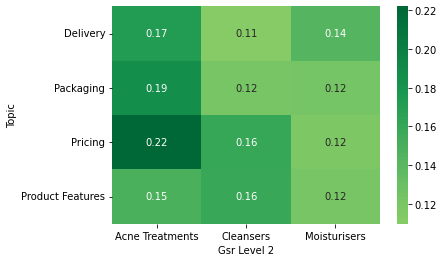

In [21]:
#create heat map of education vs marital vs response_rate
plt.figure()
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.0007)
plt.show()

# Product Wise Average Conversion Rate by GSR level 2 

In [36]:
df_acne = df[df.gsr_level_2 == 'Acne Treatments']
df_moisturiser = df[df.gsr_level_2 == 'Moisturisers']
df_cleansers = df[df.gsr_level_2 == 'Cleansers']

In [37]:
df_acne.groupby('translated_title')[['conversion_rate_vc']].mean().reset_index().sort_values(by=['conversion_rate_vc'],ascending=False)

translated_title  conversion_rate_vc
2  Neutrogena Anti-Pimple Face Cream, Daily Moist...            0.238080
0  Neutrogena Anti-Blackhead facial tonic, pore c...            0.215113
7  Neutrogena anti-pimple face care, SOS immediat...            0.193403
9  Neutrogena anti-pimple facial cleansing, daily...            0.164458
1  Neutrogena Anti-Pimple Daily Wash Gel (200 ml)...            0.163842
8  Neutrogena anti-pimple facial cleansing, 2-in-...            0.148046
5  Neutrogena Curcuma Clear Soothing cleansing fo...            0.133676
4  Neutrogena Curcuma Clear Soothing Moisturizer,...            0.126116
3  Neutrogena Curcuma Clear Face Care, Soothing M...            0.109310
6  Neutrogena Curcuma Clear facial cleansing, soo...            0.099491

In [38]:
df_acne.title.nunique()

10

In [39]:
df_moisturiser.groupby('title')[['conversion_rate_vc']].mean().reset_index().sort_values(by=['conversion_rate_vc'],ascending=False)

title  conversion_rate_vc
6  Neutrogena Hydro Boost Gesichtscreme, Nachtcre...            0.171399
2  Neutrogena Hydro Boost Aqua Gel (50ml) - Feuch...            0.168250
5  Neutrogena Hydro Boost Gesichtscreme, Aqua Cre...            0.152945
8  Neutrogena Hydro Boost Hyaluron Konzentrat (15...            0.127852
9  Neutrogena Hydro Boost Hyaluron Serum, Aqua Pe...            0.124508
7  Neutrogena Hydro Boost Gesichtspflege Set, Ges...            0.111847
4  Neutrogena Hydro Boost Augencreme Gel, mit Gly...            0.086193
1  Neutrogena Glow Boost revitalisierendes LSF 30...            0.083779
0  Neutrogena Glow Boost Revitalisierende Tagespf...            0.082593
3  Neutrogena Hydro Boost Aqua Intensivpflege (50...            0.080186

In [40]:
df_cleansers.groupby('title')[['conversion_rate_vc']].mean().reset_index().sort_values(by=['conversion_rate_vc'],ascending=False)

title  conversion_rate_vc
6   Neutrogena Hydro Boost AbschminktÃ¼cher, Aqua ...            0.304657
2   Neutrogena Curcuma Clear Beruhigende Reinigung...            0.205100
0   Neutrogena Anti-Pickel+ TÃ¤gliches Serum (30 m...            0.192287
4   Neutrogena Deep Clean Gesichtsreinigung, 3-in-...            0.191614
9   Neutrogena Hydro Boost Gesichtsreinigung, Aqua...            0.168665
5   Neutrogena Deep Clean Gesichtsreinigung, Hautb...            0.150568
3   Neutrogena Deep Clean Gesichtsreinigung, 2-in-...            0.148762
1   Neutrogena Anti-Pickel+ TÃ¤gliches Waschgel (2...            0.143404
7   Neutrogena Hydro Boost Geschenk Set Gesichtspf...            0.108360
10  Neutrogena Hydro Boost Gesichtsreinigung, Mize...            0.104977
8   Neutrogena Hydro Boost Geschenkset Gesichtspfl...            0.049020

In [41]:
df_acne=df_acne[['title','Topic','conversion_rate_vc']]
df_moisturiser=df_moisturiser[['title','Topic','conversion_rate_vc']]
df_cleansers=df_cleansers[['title','Topic','conversion_rate_vc']]

In [42]:
df_acne

title             Topic  \
0     Neutrogena Anti-Pickel Gesichtspflege, SOS Sof...  Product Features   
1     Neutrogena Curcuma Clear Beruhigender Reinigun...  Product Features   
3     Neutrogena Curcuma Clear Gesichtsreinigung, Be...  Product Features   
5     Neutrogena Curcuma Clear Beruhigende Feuchtigk...  Product Features   
7     Neutrogena Curcuma Clear Beruhigender Reinigun...  Product Features   
...                                                 ...               ...   
2424  Neutrogena Anti-Mitesser Gesichtswasser, Poren...  Product Features   
2431  Neutrogena Curcuma Clear Gesichtsreinigung, Be...  Product Features   
2432  Neutrogena Curcuma Clear Beruhigende Feuchtigk...  Product Features   
2435  Neutrogena Anti-Mitesser Gesichtswasser, Poren...          Delivery   
2436  Neutrogena Anti-Mitesser Gesichtswasser, Poren...          Delivery   

      conversion_rate_vc  
0                 0.1654  
1                 0.1065  
3                 0.1390  
5                 0.0843  
7                 0.1199  
...                  ...  
2424              0.2599  
2431              0.0759  
2432              0.0932  
2435              0.2628  
2436              0.2628  

[1301 rows x 3 columns]

# Filtering by Positive and Negative CR

In [43]:
df_acne1 = df_acne[df_acne.conversion_rate_vc > 0.18]
df_acne2 = df_acne[df_acne.conversion_rate_vc < 0.12]

df_moisturiser1 = df_moisturiser[df_moisturiser.conversion_rate_vc > 0.18]
df_moisturiser2 = df_moisturiser[df_moisturiser.conversion_rate_vc < 0.12]

df_cleansers1 = df_cleansers[df_cleansers.conversion_rate_vc > 0.18]
df_cleansers2 = df_cleansers[df_cleansers.conversion_rate_vc < 0.12]

# Topic Vs Conversion Rate Visualizations for Acne Treaments

In [44]:
df_acne1

title             Topic  \
24    Neutrogena Curcuma Clear Gesichtspflege, Beruh...  Product Features   
25    Neutrogena Curcuma Clear Gesichtspflege, Beruh...  Product Features   
26    Neutrogena Curcuma Clear Gesichtspflege, Beruh...  Product Features   
34    Neutrogena Curcuma Clear Gesichtspflege, Beruh...  Product Features   
35    Neutrogena Curcuma Clear Gesichtspflege, Beruh...  Product Features   
...                                                 ...               ...   
2422  Neutrogena Anti-Pickel Gesichtspflege, SOS Sof...  Product Features   
2423  Neutrogena Anti-Pickel TÃ¤gliches Waschgel (20...  Product Features   
2424  Neutrogena Anti-Mitesser Gesichtswasser, Poren...  Product Features   
2435  Neutrogena Anti-Mitesser Gesichtswasser, Poren...          Delivery   
2436  Neutrogena Anti-Mitesser Gesichtswasser, Poren...          Delivery   

      conversion_rate_vc  
24                0.2295  
25                0.2295  
26                0.2295  
34                0.3200  
35                0.3200  
...                  ...  
2422              0.2286  
2423              0.2032  
2424              0.2599  
2435              0.2628  
2436              0.2628  

[390 rows x 3 columns]

In [45]:
result1=df_acne1.pivot_table(index='title', columns='Topic', values='conversion_rate_vc',aggfunc=np.mean)

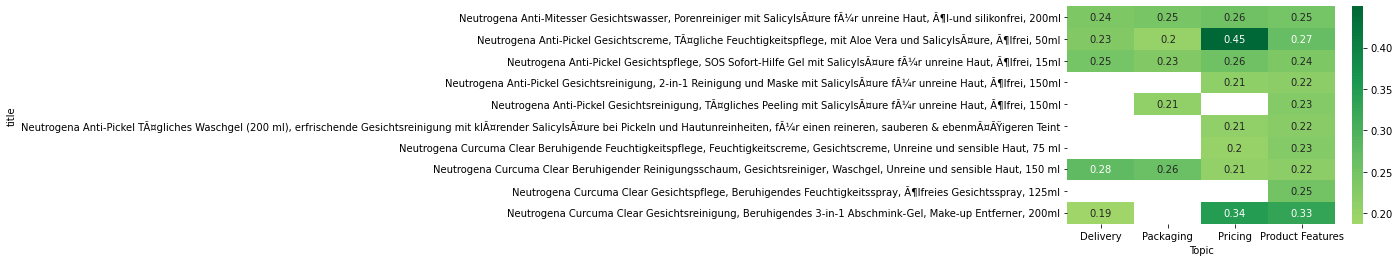

In [47]:
#create heat map of education vs marital vs response_rate
plt.figure()
sns.heatmap(result1, annot=True, cmap = 'RdYlGn', center=0.0007)
plt.show()

In [48]:
df_acne1= df[df.gsr_level_2 == 'Acne Treatments']

In [49]:
acne=df_acne.groupby(['Topic'])[['conversion_rate_vc']].mean().reset_index().sort_values(by=['conversion_rate_vc'], ascending=False)

In [50]:
acne

Topic  conversion_rate_vc
2           Pricing            0.222080
1         Packaging            0.185755
0          Delivery            0.172190
3  Product Features            0.149195

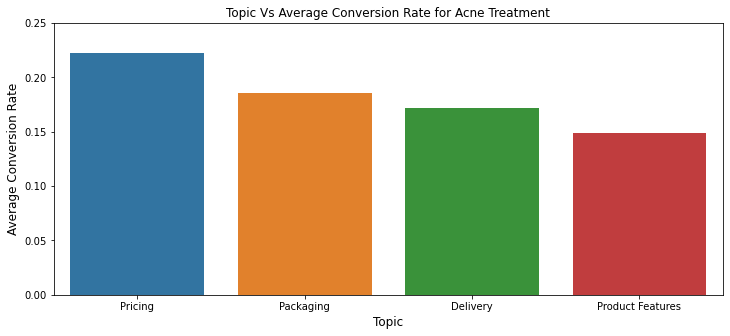

In [51]:
plt.figure(figsize = ( 12, 5))
sns.barplot(x='Topic',y='conversion_rate_vc',data=acne)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel( "Topic" , size = 12 )
plt.ylabel( "Average Conversion Rate" , size = 12)
plt.ylim(0, 0.25)
plt.title( "Topic Vs Average Conversion Rate for Acne Treatment" , size = 12)
plt.show()

# Topic Vs Conversion Rate Visualizations for Moisturisers

In [52]:
mois=df_moisturiser.groupby(['Topic'])[['conversion_rate_vc']].mean().reset_index().sort_values(by=['conversion_rate_vc'], ascending=False)

In [53]:
mois

Topic  conversion_rate_vc
0          Delivery            0.143485
1         Packaging            0.122914
3  Product Features            0.120930
2           Pricing            0.117555

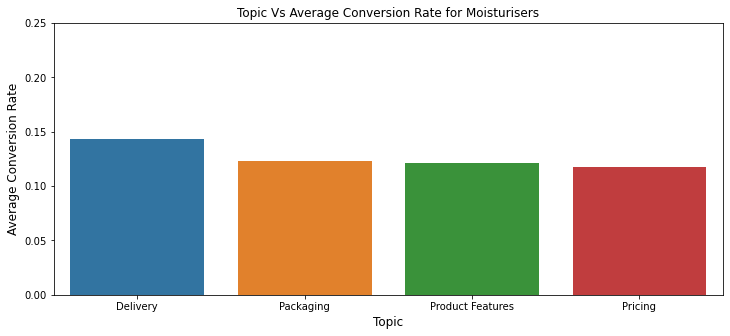

In [54]:
plt.figure(figsize = ( 12, 5))
sns.barplot(x='Topic',y='conversion_rate_vc',data=mois)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel( "Topic" , size = 12 )
plt.ylabel( "Average Conversion Rate" , size = 12)
plt.ylim(0, 0.25)
plt.title( "Topic Vs Average Conversion Rate for Moisturisers" , size = 12)
plt.show()

# Topic Vs Conversion Rate Visualizations for Cleansers

In [55]:
cleansers=df_cleansers.groupby(['Topic'])[['conversion_rate_vc']].mean().reset_index().sort_values(by=['conversion_rate_vc'], ascending=False)

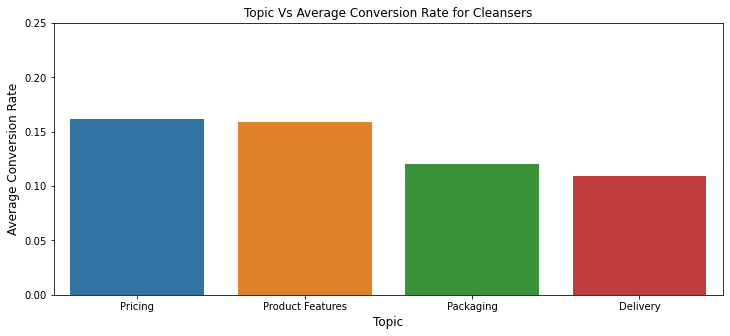

In [56]:
plt.figure(figsize = ( 12, 5))
sns.barplot(x='Topic',y='conversion_rate_vc',data=cleansers)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel( "Topic" , size = 12 )
plt.ylabel( "Average Conversion Rate" , size = 12)
plt.ylim(0, 0.25)
plt.title( "Topic Vs Average Conversion Rate for Cleansers" , size = 12)
plt.show()